## 1. Fragestellungen und Datenbeschaffung

### 1.1 Fragestellung:
1. Wie hat sich der Anteil unterernährter Menschen weltweit zwischen 2000 und 2023 verändert?
2. Welche Weltregionen sind im Jahr 2023 am stärksten von Unterernährung betroffen?
3. Welche Weltregionen sind im Jahr 2023 am niedrigsten von Unterernährung betroffen?
4. Gibt es einen Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren?
5. Gibt es Länder, in denen die Unterernährungsrate besonders stark gesunken oder gestiegen ist?

## Unsere Datenquellen:
-  https://ourworldindata.org/hunger-and-undernourishment



In [1]:
## Unsere Rohdaten

In [ ]:

import pandas as pd
import zipfile

zip_path = "prevalence-of-undernourishment.zip"

with zipfile.ZipFile(zip_path) as z:
    file_name = "prevalence-of-undernourishment.csv"
    
    df = pd.read_csv(z.open(file_name))

df

df = df.rename(columns={
    "2.1.1 Prevalence of undernourishment | 000000000024000 || Value | 006121 || percent": "Prevalence (%)"
})

df


,Entity,Code,Year,Prevalence (%)
0,Afghanistan,AFG,2001,46.0
1,Afghanistan,AFG,2002,43.7
2,Afghanistan,AFG,2003,38.6
3,Afghanistan,AFG,2004,35.9
4,Afghanistan,AFG,2005,34.2
...,...,...,...,...
4678,Zimbabwe,ZWE,2018,38.7
4679,Zimbabwe,ZWE,2019,39.4
4680,Zimbabwe,ZWE,2020,39.5
4681,Zimbabwe,ZWE,2021,38.9


# 2 Daten vorbereiten

## 2.1 Überblick: Format des Datensatzes und Spaltenstruktur

In [7]:
# --- Überblick über Spalten und Struktur ---
print("=== 1. Format des Datensatzes & Spaltenstruktur ===")
print("Spalten im Datensatz:")
print(df.columns)

print("\nErste 5 Zeilen des DataFrames (Long-Format):")
print(df.head())

=== 1. Format des Datensatzes & Spaltenstruktur ===
Spalten im Datensatz:
Index(['Entity', 'Code', 'Year', 'Prevalence (%)'], dtype='object')

Erste 5 Zeilen des DataFrames (Long-Format):
        Entity Code  Year  Prevalence (%)
0  Afghanistan  AFG  2001            46.0
1  Afghanistan  AFG  2002            43.7
2  Afghanistan  AFG  2003            38.6
3  Afghanistan  AFG  2004            35.9
4  Afghanistan  AFG  2005            34.2


Die ersten fünf Zeilen unseres DataFrames werden angezeigt, um einen schnellen Überblick über die Daten zu erhalten. Der DataFrame ist numerisch aufgebaut und nach Ländern/Regionen in alphabetischer Reihenfolge sowie nach Jahren sortiert

In [10]:
# 2.1 Struktur der Daten
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          4683 non-null   object 
 1   Code            3843 non-null   object 
 2   Year            4683 non-null   int64  
 3   Prevalence (%)  4683 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 146.5+ KB


Dieser Code verschafft uns ebenfalls einen schnellen Überblick über die Struktur des DataFrames, die Datentypen der Spalten und fehlende Werte. Dies äußert sich in einer kompakten Tabelle, die Spaltennamen, Anzahl der vorhandenen Einträge pro Spalte, Datentypen und den Speicherverbrauch anzeigt.

In [11]:
# 2.2 Statistische Übersicht der numerischen Variablen
df.describe()

,Year,Prevalence (%)
count,4683.000000,4683.000000
mean,2011.511211,11.057015
std,6.461964,10.785757
min,2000.000000,2.500000
25%,2006.000000,2.500000
50%,2012.000000,6.600000
75%,2017.000000,16.000000
max,2023.000000,71.400000


Hier erhalten wir eine statistische Übersicht aller numerischen Spalten im DataFrame. Dies äußert sich in einer Tabelle mit Kennwerten wie Anzahl, Mittelwert, Standardabweichung, Minimum, Maximum sowie den 25%, 50% und 75% Perzentilen, die einen schnellen Eindruck von der Verteilung der Daten geben.

## 2.2 Long-Format vs. Wide-Format (Pivot)

In [12]:
# --- Long-Format (Original) ---
print("=== Long-Format: Original ===")
print(df.head())

=== Long-Format: Original ===
        Entity Code  Year  Prevalence (%)
0  Afghanistan  AFG  2001            46.0
1  Afghanistan  AFG  2002            43.7
2  Afghanistan  AFG  2003            38.6
3  Afghanistan  AFG  2004            35.9
4  Afghanistan  AFG  2005            34.2


Hier erhalten wir die ersten fünf Zeilen des DataFrames im Long-Format. Dies äußert sich darin, dass die Daten zeilenweise angezeigt werden, wodurch wir einen schnellen Eindruck von Aufbau, Werten und Formatierung des Originaldatensatzes bekommen.

In [14]:
# --- Wide-Format: Jahre als Spalten ---
df_wide = df.pivot(index='Entity', columns='Year', values='Prevalence (%)')
print("=== Wide-Format: Pivotiert nach Jahr ===")
print(df_wide.head())

=== Wide-Format: Pivotiert nach Jahr ===
Year            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Entity                                                                       
Afghanistan      NaN  46.0  43.7  38.6  35.9  34.2  31.6  28.3  25.1  21.6   
Africa (FAO)    22.9  22.2  21.8  21.5  21.0  19.9  18.8  18.3  17.5  17.0   
Albania          NaN   4.9   6.0   7.4   8.6   8.9   8.9   8.4   7.4   6.2   
Algeria          NaN   7.5   6.8   6.5   6.5   6.2   6.0   5.5   5.2   4.8   
Americas (FAO)   6.5   6.3   6.6   6.0   5.9   5.6   5.2   5.0   4.6   4.6   

Year            ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
Entity          ...                                                         
Afghanistan     ...  19.3  20.0  20.5  21.4  22.6  25.1  27.7  29.4  30.4   
Africa (FAO)    ...  15.5  16.0  16.8  16.7  17.1  17.4  18.8  19.3  19.9   
Albania         ...   4.5   4.4   4.3   4.3   4.2   4.3   4.4   4.3   4.5   
Algeria         ...   2.7  

Durch diesen Code wird der DataFrame ins Wide-Format transformiert, sodass jede Zeile eine Entität (Land) darstellt und jedes Jahr eine eigene Spalte mit den entsprechenden Prävalenzwerten enthält. Dies äußert sich in einer übersichtlichen Tabelle, die es einfacher macht, Werte jahresweise pro Entität zu vergleichen.

## 2.3 Datentypen prüfen

In [8]:
# --- Datentypen der Spalten ---
print("=== 2. Datentypen der Spalten ===")
print(df.dtypes)

=== 2. Datentypen der Spalten ===
Entity             object
Code               object
Year                int64
Prevalence (%)    float64
dtype: object


In [15]:
# 2.3 Datentypen
df.dtypes

Entity             object
Code               object
Year                int64
Prevalence (%)    float64
dtype: object

Die Ausgabe zeigt die Datentypen der einzelnen Spalten in deinem DataFrame:

Entity → object (Text/String, z. B. Ländername)

Code → object (Text/String, z. B. Ländercode)

Year → int64 (Ganzzahlen, z. B. Jahreszahlen)

Prevalence (%) → float64 (Dezimalzahlen, z. B. Prozentwerte)

Damit wissen wir genau, welche Spalten numerisch sind und welche als Text behandelt werden, was wichtig für Berechnungen oder Visualisierungen ist.

# 3 Statistik der Rohdaten (Analyse im Long-Format)

## 3.1 Charakterisierung der Variablen

### 3.1.1 Kontinuierlich oder Diskret?

In [18]:
# Variable: Prevalence (%) → kontinuierlich?
print("Einige Werte der Prevalence (%)")
print(df['Prevalence (%)'].head())

# Für Entity und Year prüfen, wie viele einzigartige Werte es gibt
print("\nAnzahl einzigartiger Länder (Entity):", df['Entity'].nunique())
print("Anzahl einzigartiger Jahre (Year):", df['Year'].nunique())

# Anzahl Datenpunkte pro Land
print("\nDatenpunkte pro Land:")
print(df['Entity'].value_counts())

# Anzahl Datenpunkte pro Jahr
print("\nDatenpunkte pro Jahr:")
print(df['Year'].value_counts())

Einige Werte der Prevalence (%)
0    46.0
1    43.7
2    38.6
3    35.9
4    34.2
Name: Prevalence (%), dtype: float64

Anzahl einzigartiger Länder (Entity): 211
Anzahl einzigartiger Jahre (Year): 24

Datenpunkte pro Land:
Entity
Africa (FAO)                                 24
Asia (FAO)                                   24
Americas (FAO)                               24
Eastern Asia (FAO)                           24
Eastern Asia and South-eastern Asia (FAO)    24
                                             ..
Uruguay                                      22
Yemen                                        22
North Korea                                  18
Sudan                                        10
South Sudan                                   3
Name: count, Length: 211, dtype: int64

Datenpunkte pro Jahr:
Year
2017    210
2018    210
2020    210
2021    210
2013    210
2014    210
2015    210
2016    210
2022    210
2007    209
2006    209
2005    209
2004    209
2003    209
2002   

Der Code gibt einen Einblick in die Variable Prevalence (%) und prüft, wie viele einzigartige Länder (Entity) und Jahre (Year) im Datensatz vorhanden sind. Dadurch lässt sich erkennen, dass Prevalence (%) eine kontinuierliche Variable ist, während Entity und Year diskrete Merkmale darstellen, und er zeigt die Verteilung der Datenpunkte pro Land und pro Jahr. Damit zeigt sich, dass Prevalence (%) eine kontinuierliche Variable ist, während Entity und Year diskrete Merkmale darstellen.

### 3.1.2 Anzahl einzigartiger Klassen pro diskreter Variable

In [45]:
# Diskrete Variablen: Entity, Code, Year
discrete_vars = ['Entity', 'Code', 'Year']

for col in discrete_vars:
    print(f"--- Variable: {col} ---")
    print("Anzahl einzigartiger Klassen:", df[col].nunique())
    print("\n")

--- Variable: Entity ---
Anzahl einzigartiger Klassen: 211


--- Variable: Code ---
Anzahl einzigartiger Klassen: 176


--- Variable: Year ---
Anzahl einzigartiger Klassen: 24




Der Code überprüft die Anzahl einzigartiger Klassen für die diskreten Variablen Entity, Code und Year. Das Ergebnis zeigt, dass es 211 unterschiedliche Länder (Entity), 176 verschiedene Ländercodes (Code) und 24 verschiedene Jahre (Year) im Datensatz gibt. Damit lässt sich erkennen, wie viele einzelne Kategorien jede dieser diskreten Variablen enthält, was wichtig für die Analyse der Datenverteilung ist.

### 3.1.3 Anzahl Datenpunkte pro Klasse

In [46]:
# Diskrete Variablen: Entity, Code, Year
discrete_vars = ['Entity', 'Code', 'Year']

for col in discrete_vars:
    print(f"--- Variable: {col} ---")
    print("Anzahl Datenpunkte pro Klasse:")
    print(df[col].value_counts())
    print("\n")

--- Variable: Entity ---
Anzahl Datenpunkte pro Klasse:
Entity
Africa (FAO)                                 24
Asia (FAO)                                   24
Americas (FAO)                               24
Eastern Asia (FAO)                           24
Eastern Asia and South-eastern Asia (FAO)    24
                                             ..
Uruguay                                      22
Yemen                                        22
North Korea                                  18
Sudan                                        10
South Sudan                                   3
Name: count, Length: 211, dtype: int64


--- Variable: Code ---
Anzahl Datenpunkte pro Klasse:
Code
OWID_PYA    24
OWID_WRL    24
OWID_MNS    24
AFG         22
ARG         22
            ..
VUT         22
ZWE         22
PRK         18
SDN         10
SSD          3
Name: count, Length: 176, dtype: int64


--- Variable: Year ---
Anzahl Datenpunkte pro Klasse:
Year
2017    210
2018    210
2020    210
2021    

Der Code ermittelt die Anzahl der Datenpunkte pro Klasse für die diskreten Variablen Entity, Code und Year. Das Ergebnis zeigt, dass viele Länder bzw. Codes für alle Jahre vollständig vorliegen (z. B. 24 Datenpunkte), während einige Länder wie South Sudan nur wenige Werte haben (3 Datenpunkte), und bei den Jahren die Anzahl der Messwerte je Jahr variiert. Damit wird ersichtlich, wie vollständig oder lückenhaft die Daten für jede Klasse sind, was bei der weiteren Analyse berücksichtigt werden sollte.

## 3.2 Anzahl Datenpunkte (Beschreibend)

### 3.2.1 Datenpunkte für die bestimmten Variabeln

In [30]:
# Gesamtanzahl der Zeilen (Datenpunkte)
print("Gesamtanzahl Datenpunkte:", len(df))

Gesamtanzahl Datenpunkte: 4683


Die Gesamtanzahl der Datenpunkte im DataFrame beträgt 4683, was die Anzahl der erfassten Beobachtungen im Datensatz angibt. Diese Zahl gibt einen Überblick über die Datenbasis und ist wichtig für die Interpretation statistischer Auswertungen und grafischer Darstellungen.

In [31]:
# Anzahl nicht fehlender Werte pro Spalte
print("\nAnzahl vorhandener Datenpunkte pro Variable:")
print(df.count())


Anzahl vorhandener Datenpunkte pro Variable:
Entity            4683
Code              3843
Year              4683
Prevalence (%)    4683
dtype: int64


Die Ausgabe zeigt die Anzahl der vorhandenen Werte pro Spalte im DataFrame. Während Entity, Year und Prevalence (%) vollständig erfasst sind (4683 Werte), fehlen bei Code einige Einträge, da nur 3843 Werte vorliegen. Dies gibt einen Überblick über vollständige und fehlende Daten für jede Variable, was bei der Analyse berücksichtigt werden sollte.

### 3.2.2 Wo fehlen Datenpunkte?

Fehlende Datenpunkte pro Variable: Anzahl fehlender Werte pro Spalte

In [16]:
missing_counts = df.isna().sum()
print("\nFehlende Datenpunkte pro Variable:")
print(missing_counts)


Fehlende Datenpunkte pro Variable:
Entity              0
Code              840
Year                0
Prevalence (%)      0
dtype: int64


Die Auswertung zeigt, in welchen Variablen fehlende Datenpunkte vorhanden sind. Während Entity, Year und Prevalence (%) vollständig erfasst sind, fehlen bei Code 840 Werte, was auf unvollständige Ländercodes hinweist. Diese Information ist wichtig, um bei Analysen oder Berechnungen fehlende Werte gezielt zu behandeln.

Prozentualer Anteil fehlender Werte

In [49]:
missing_percent = (df.isna().sum() / len(df)) * 100
print("\nProzentualer Anteil fehlender Werte pro Variable:")
print(missing_percent)


Prozentualer Anteil fehlender Werte pro Variable:
Entity             0.00000
Code              17.93722
Year               0.00000
Prevalence (%)     0.00000
dtype: float64


Der Code berechnet den prozentualen Anteil fehlender Werte für jede Variable im DataFrame. Während Entity, Year und Prevalence (%) vollständig sind (0 %), fehlen bei Code etwa 17,94 % der Einträge. Dies zeigt, dass insbesondere die Ländercodes unvollständig sind und bei der Analyse berücksichtigt oder bereinigt werden müssen.

Grafische Darstellung: vorhandene vs. fehlende Datenpunkte

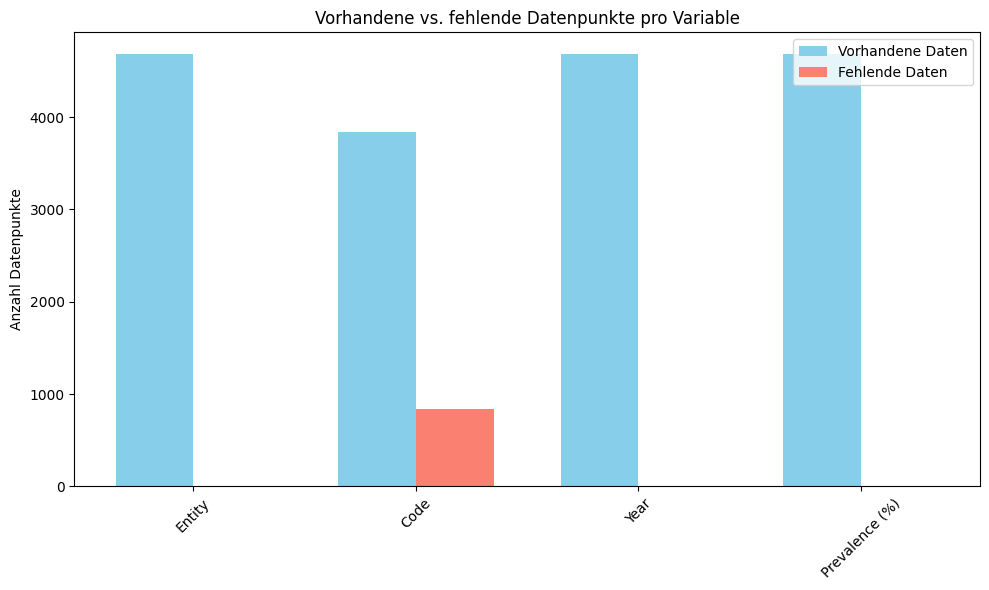

In [23]:
import matplotlib.pyplot as plt
import numpy as np

variables = df.columns
present = df.count().values
missing = df.isna().sum().values
x = np.arange(len(variables))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, present, width, label='Vorhandene Daten', color='skyblue')
plt.bar(x + width/2, missing, width, label='Fehlende Daten', color='salmon')

plt.xticks(x, variables, rotation=45)
plt.ylabel("Anzahl Datenpunkte")
plt.title("Vorhandene vs. fehlende Datenpunkte pro Variable")
plt.legend()
plt.tight_layout()
plt.show()

Das Diagramm visualisiert die Anzahl der vorhandenen (hellblau) und fehlenden (lachsrot) Datenpunkte für vier Variablen: Entity, Code, Year und Valence (%). Das Ergebnis zeigt, dass nur die Variable 'Code' eine Anzahl fehlender Datenpunkte aufweist, während die anderen Variablen nahezu vollständig sind.

## 3.3 Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)

### 3.3.1 Histogramm (Verteilung der Unterernährungsrate)

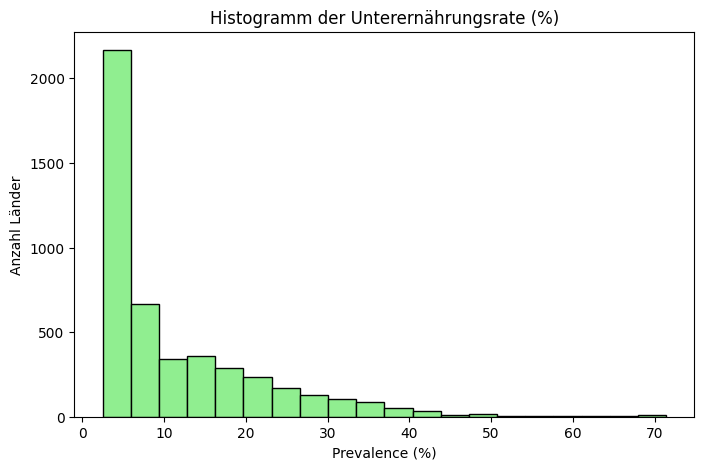

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Prevalence (%)'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogramm der Unterernährungsrate (%)")
plt.xlabel("Prevalence (%)")
plt.ylabel("Anzahl Länder")
plt.show()

Das Ergebnis des Histogramms zeigt eine stark rechtsschiefe Verteilung, bei der die überwiegende Mehrheit der Länder eine sehr niedrige Prävalenz von Unterernährung aufweist, während nur wenige Länder hohe Raten melden. Die Grafik verwendet 20 Bins, um die Häufigkeit der Länder (Anzahl Länder) über verschiedene Prävalenzbereiche (%) darzustellen.

### 3.3.2 Boxplot (Ausreißer und Quartile)

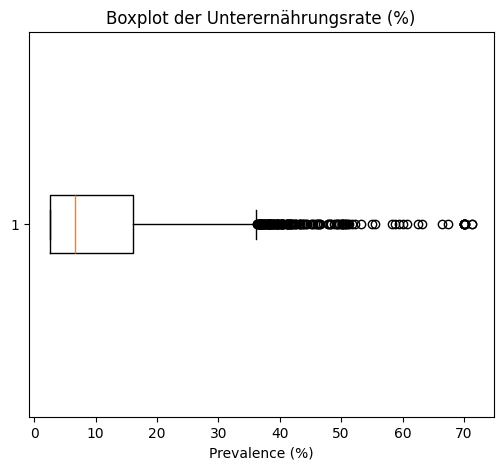

In [12]:
plt.figure(figsize=(6,5))
plt.boxplot(df['Prevalence (%)'].dropna(), vert=False)
plt.title("Boxplot der Unterernährungsrate (%)")
plt.xlabel("Prevalence (%)")
plt.show()

Das Ergebnis des Boxplots zeigt, dass die Mehrheit der Länder eine niedrige Unterernährungsrate hat (Median nahe 4%, 50% der Daten zwischen ca. 2% und 17%), aber eine große Anzahl von Ausreißern mit sehr hohen Raten bis zu 70% existiert. Der Boxplot verdeutlicht somit die stark schiefe Verteilung der Daten und die Existenz extremer Werte in einigen Ländern.

### 3.3.3 Säulendiagramm für Anzahl Datenpunkte pro Jahr

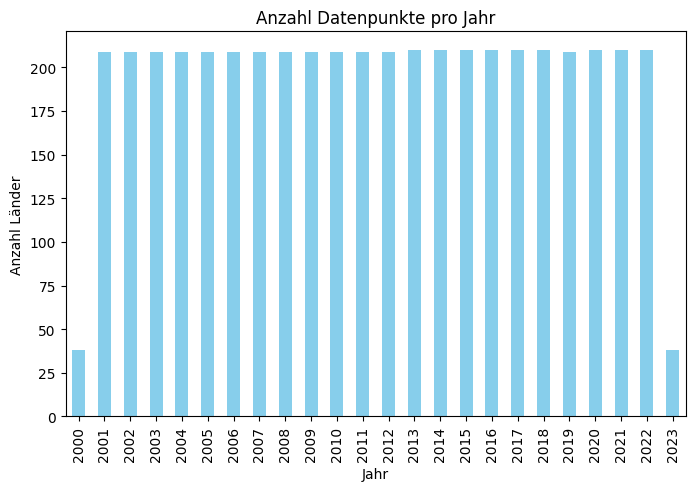

In [13]:
plt.figure(figsize=(8,5))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Anzahl Datenpunkte pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Länder")
plt.show()

Das Ergebnis in der Grafik zeigt eine nahezu vollständige Datenerfassung für alle Jahre von 2001 bis 2022 (jeweils über 200 Länder), während die Jahre 2000 und 2023 deutlich weniger Datenpunkte aufweisen. Das Diagramm visualisiert, dass der Datensatz in den Jahren 2001 bis 2022 am umfassendsten ist und die extrem niedrigen Balken am Anfang und Ende des Zeitraums die unvollständige Verfügbarkeit für diese spezifischen Jahre hervorheben.

4 Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

4.1 Streudiagramm (Scatterplot)

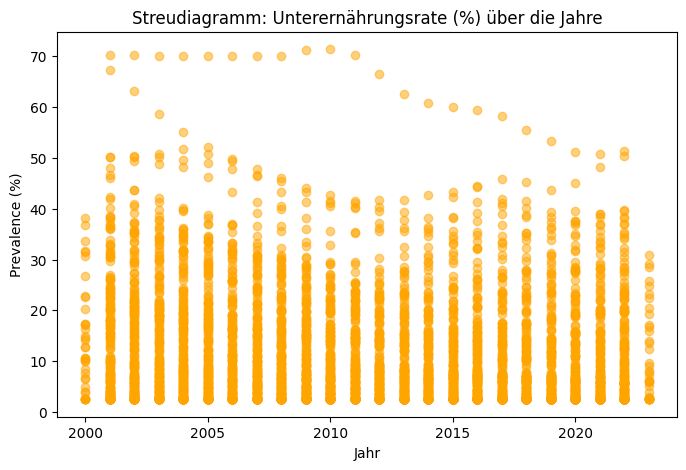

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Year'], df['Prevalence (%)'], alpha=0.5, color='orange')
plt.title("Streudiagramm: Unterernährungsrate (%) über die Jahre")
plt.xlabel("Jahr")
plt.ylabel("Prevalence (%)")
plt.show()

4.2 Korrelationsmatrix

In [15]:
numeric_vars = df[['Year', 'Prevalence (%)']]

corr_matrix = numeric_vars.corr()
print("Korrelationsmatrix:")
print(corr_matrix)

Korrelationsmatrix:
                    Year  Prevalence (%)
Year            1.000000       -0.125489
Prevalence (%) -0.125489        1.000000


# 4 Analyse

## 4.1 Spezifische Untersuchung der Fragestellung

### Fragestellung 1: Wie hat sich der Anteil unterernährter Menschen weltweit zwischen 2000 und 2023 verändert?

=== Durchschnittlicher Anteil unterernährter Menschen pro Jahr ===
    Year  Prevalence (%)
0   2000       14.305263
1   2001       14.355981
2   2002       14.041627
3   2003       13.725359
4   2004       13.315311
5   2005       12.817703
6   2006       12.232536
7   2007       11.739234
8   2008       11.289952
9   2009       10.808134
10  2010       10.324402
11  2011        9.951196
12  2012        9.758373
13  2013        9.601905
14  2014        9.540000
15  2015        9.670952
16  2016        9.740000
17  2017        9.711905
18  2018        9.676190
19  2019        9.655981
20  2020        9.996190
21  2021       10.307143
22  2022       10.456667
23  2023       11.050000


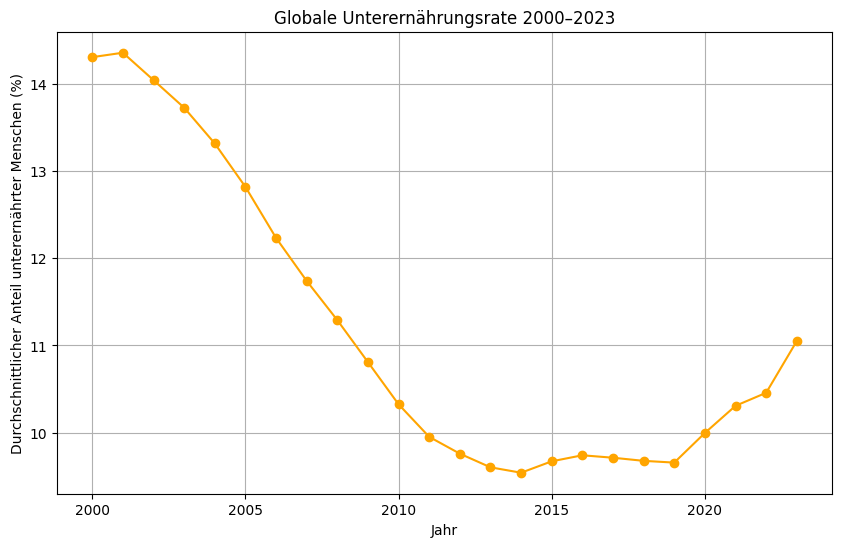


Anteil 2000: 14.31%
Anteil 2023: 11.05%
Absolute Veränderung: -3.26 Prozentpunkte
Relative Veränderung: -22.76%


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Globale Mittelwerte pro Jahr berechnen ---
global_trend = df.groupby('Year')['Prevalence (%)'].mean().reset_index()

print("=== Durchschnittlicher Anteil unterernährter Menschen pro Jahr ===")
print(global_trend)

# --- 2. Grafische Darstellung: Zeitreihe ---
plt.figure(figsize=(10,6))
plt.plot(global_trend['Year'], global_trend['Prevalence (%)'], marker='o', color='orange')
plt.title("Globale Unterernährungsrate 2000–2023")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittlicher Anteil unterernährter Menschen (%)")
plt.grid(True)
plt.show()

# --- 3. Veränderung berechnen ---
start_year = 2000
end_year = 2023

start_value = global_trend[global_trend['Year']==start_year]['Prevalence (%)'].values[0]
end_value = global_trend[global_trend['Year']==end_year]['Prevalence (%)'].values[0]

absolute_change = end_value - start_value
relative_change = (absolute_change / start_value) * 100

print(f"\nAnteil 2000: {start_value:.2f}%")
print(f"Anteil 2023: {end_value:.2f}%")
print(f"Absolute Veränderung: {absolute_change:.2f} Prozentpunkte")
print(f"Relative Veränderung: {relative_change:.2f}%")

Die bereitgestellte Auflistung und der Code zeigen eine signifikante Veränderung des durchschnittlichen Anteils unterernährter Menschen weltweit zwischen 2000 und 2023.

Zentrale Aussagen und Zusammenhänge:

- Initialer Rückgang: Der Anteil begann im Jahr 2000 bei 14,31 % und sank kontinuierlich bis zu einem Tiefpunkt von etwa 9,54 % im Jahr 2014, was auf positive globale Entwicklungen in diesem Zeitraum hindeutet.

- Stagnation und Anstieg: Ab 2015 stagnierte die Rate und begann leicht anzusteigen, besonders bemerkbar zwischen 2019 und 2023, wo sie von 9,66 % auf 11,05 % anstieg.

- Gesamtveränderung: Über den gesamten Zeitraum von 2000 bis 2023 gab es eine absolute Reduzierung um -3,26 Prozentpunkte oder eine relative Veränderung von -22,76 %.

- Zusammenhang mit externen Ereignissen: Der jüngste Anstieg der Unterernährungsrate (ab 2019) lässt sich oft mit globalen Krisen wie der COVID-19-Pandemie, Konflikten und den Auswirkungen des Klimawandels in Verbindung bringen, die die globalen Ernährungssysteme unter Druck gesetzt haben.

Die Grafik ergänzt die vorherigen Analysen und visualisiert den globalen Trend der Unterernährungsrate zwischen 2000 und 2023.

- Rückläufiger Trend: Von 2000 bis etwa 2014/2015 war ein deutlicher Rückgang des durchschnittlichen Anteils unterernährter Menschen zu verzeichnen, von etwa 14,5 % auf unter 10 %.

- Stagnation und Anstieg: Ab 2015 stagnierten die Raten und stiegen dann insbesondere ab 2019 bis 2023 wieder leicht an, auf etwa 11 %.

- Gesamtaussage: Die Darstellung zeigt, dass die globalen Bemühungen zur Reduzierung der Unterernährung über weite Strecken erfolgreich waren, jedoch in den letzten Jahren durch neue Herausforderungen (wie z.B. Krisen, Pandemien) wieder Rückschläge erfahren haben.


### Fragestellung 2: Welche Weltregionen sind im Jahr 2023 am stärksten von Unterernährung betroffen?

### Fragestellung 3: Welche Weltregionen sind im Jahr 2023 am niedrigsten von Unterernährung betroffen?

### Fragestellung 4: Gibt es einen Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren?

### Fragestellung 5: Gibt es Regionen, in denen die Unterernährungsrate besonders stark gesunken oder gestiegen ist?